# Introdu√ß√£o √† Programa√ß√£o em F√≠sica
# Prova 2

### Professor: Gustavo Guerrero

### Alunos:
1. Lais de Figueiredo Maia
2. Samuel Mol Holmquist

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib
import math
%matplotlib inline

#### 1. Diferencia√ß√£o num√©rica: crescimento da popula√ß√£o, modelo logistico (25%)

O modelo log√≠stico do crescimento da popula√ß√£o √© derivado a partir de uma taxa de crescimento `n√£o linear`. Seja $u$ uma determinada popula√ß√£o (ex. formigas, abelhas, seres humanos),  o crescimento da mesma √© governado pela seguinte equa√ß√£o:

$$
\frac{du}{dt} = a(u) u
$$

Note que $a$ √© uma fun√ß√£o de $u$, daqui vem a n√£o linearidade.  A escolha mais simples para $a$ tem a forma:

$$
a(u) = \rho (1 - \frac{u}{M})^P \; ,
$$

Onde $P$ √© um n√∫mero real. A vari√°vel $M$ determina o m√°ximo numero de habitantes que um determinado ambiente pode sustentar, $\rho$ representa o crescimento da popula√ß√£o com acesso ilimitado a recursos de superviv√™ncia (esse seria o caso quando a popula√ß√£o $u$ √© pequena).  Segundo a equa√ß√£o acima  $a(u) \sim \rho$ quando $u$ √© pequeno, e $a(t) \rightarrow 0$ quando $u \rightarrow M $. 

Considere $\rho = 1$, $M=1$, $P=1$ e uma popula√ß√£o inicial $u_0 = 0.1$ indiv√≠duos, formule e resolva a equa√ß√£o diferencial acima utilizando o m√©todo de diferen√ßas finitas *forward*. O tempo inicial √© $t=0$ e o final $t=10$. Utilize 32, 64 e 128 pontos temporais.  Compare suas respostas.

0.07874015748031496
0.07874015748031496


Text(0, 0.5, 'Derivada Foward')

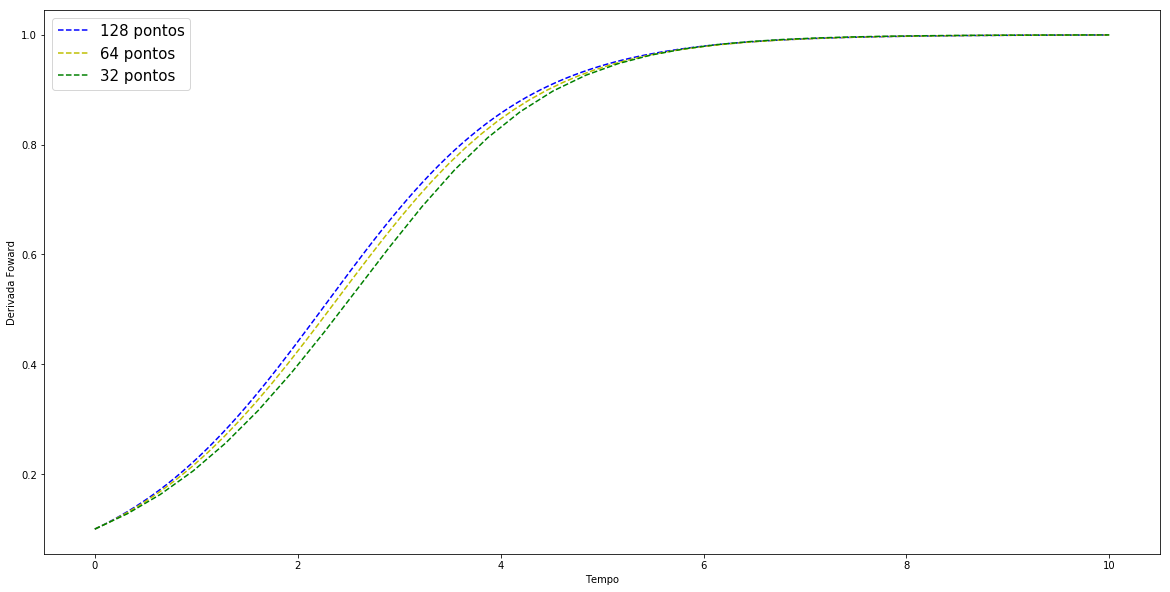

In [186]:
h=10/32
i=1
a = 0.1
ut32 = np.zeros(32)
t32 = np.linspace(0,10,32)
ut32[0] = a
while i<32:
    # u
    u = a + (h*a*(1-a))
    # u(t), onde t = i*h, = u
    ut32[i] = u
    a = u
    i = i+1
    
h=10/64
i=1
a = 0.1
ut64 = np.zeros(64)
t64 = np.linspace(0,10,64)
ut64[0] = a
while i<64:
    # u
    u = a + (h*a*(1-a))
    # u(t), onde t = i*h, = u
    ut64[i] = u
    a = u
    i = i+1
    
N = 128
h=10/(N-1)
i=1
a = 0.1
ut128 = np.zeros(N)
t128 = np.linspace(0,10,N)
print(t128[1])
print(h)
ut128[0] = a
while i<N:
    # u
    u = a + (h*a*(1-a))
    # u(t), onde t = i*h, = u
    ut128[i] = u
    a = u
    i = i+1
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(t128,ut128,color='b',linestyle='--',label='128 pontos')
plt.plot(t64,ut64,color='y',linestyle='--',label ='64 pontos')
plt.plot(t32,ut32,color='g',linestyle='--',label='32 pontos')
ax.legend(loc=2,fontsize=15)
plt.xlabel('Tempo')
plt.ylabel('Derivada Foward')

#### 2.  Integra√ß√£o num√©rica (25%)

##### Integra√ß√£o adaptativa:

Os m√©todos que aprendemos na sala de aula est√£o baseados num comprimento $dx$ fixo,  normalmente definido por quem faz a integra√ß√£o. Se escolhemos o passo muito pequeno, o resultado da integral pode ser impreciso. Por outro lado, se diminu√≠mos $dx$ aumentando o numero de pontos a integrar, o calculo consume muito tempo e pode levar a erros de `roundoff`, como j√° vimos. 

Podemos criar um algoritmo adaptativo no qual o numero de pontos, e assim o valor de $dx$ √© definido automaticamente quando nossa integral satisfaz certa toler√¢ncia (ex. $10^{-10}$). 

A ideia pode ser implementada seguindo os seguintes passos:

a) Calculamos nossa primeira aproxima√ß√£o, calculando a integral, $I_T$ no dom√≠nio inteiro, $[a,b]$ e com um numero $n$, pequeno, ex. 8 pontos.

b) Dividimos o intervalo de integra√ß√£o em dois, usando $c=(a+b)/2$. Ent√£o calculamos duas integrais, $I_{1L}$ desde $[a,c]$ com $n$ pontos, e $I_{1R}$ de $[c,b]$ com $n$ pontos. 

c) Estimamos se $| I_{1L}+I_{1R} - I_T | < {\rm toler√¢ncia}$, se sim, a integra√ß√£o est√° pronta, se a condi√ß√£o n√£o √© satisfeita, dividimos novamente, podemos criar um processo recorrente onde a integral √© novamente divida em sub-intervalos subsequentes at√© que a toler√¢ncia √© atingida. 

√â importante definir a toler√¢ncia e um n√∫mero m√°ximo de itera√ß√µes. 

1. Implemente uma fun√ß√£o que implemente esse m√©todo e que possa ser usada tanto com o m√©todo do trapecio quanto pelo m√©todo de Simpson.  Teste seu m√©todo calculando a integral de 

$$
I = \int^1_0 \frac{4}{1+x^2}
$$



In [187]:
def f(x):
    #fun√ß√£o a ser integrada
    return (4/(1 + (x**2)))
def simpson(a, b, N):#fun√ß√£o integral pelo m√©todo de simpson
    x = np.linspace(a,b,N)
    h = x[1]-x[0]
    integral = h/3*(f(x[0]) + f(x[-1]))
    fac = 4.
    for xi in x[1:-1]:
        integral += fac/3*h*f(xi)
        fac = (2. if fac == 4. else 4.)
    return integral
def trapezio(a, b, N):#fun√ß√£o integral pelo m√©trodo do trap√©zio
    x = np.linspace(a,b,N)
    h = x[1]-x[0]
    integral = h*0.5*(f(x[0]) + f(x[-1]))
    for xi in x[1:-1]:
        integral += h*f(xi)
    return integral
oll = 10**(-10)
p = 2
g = 0.1
sum1 = simpson(0,1,9) #sum1 √© a integral de 0 a 1, com o linspace com 9 pontos, pelo m√©todo de simpson
sum11 = trapezio(0,1,9)#sum11 √© a integral de 0 a 1, com o linspace com 9 pontos, pelo m√©todo de simpson
a = (1-g)
while True:
    sum2 = 0
    sum22 = 0
    l = 0
    p = 1 + p
    t = 1/(p - 1)

    for i in range(p-1):
        sum2 = sum2 + simpson(l,t,9)
        sum22= sum22 + trapezio(l,t,9)
        a = l
        l = t
        t = t + (t - a)
    if abs(sum22 - sum11)>oll and abs(sum2 - sum1)>oll: #abs=absolute value
        sum11 = sum22
        continue
    print('Result trapezio',sum22)
    print('Result simpson:',sum2)
    break

Result trapezio 3.1415926349721692
Result simpson: 3.1415926535898464


#### 3. Interpola√ß√£o, splines c√∫bicos (25%)

##### Acelera√ß√£o de part√≠culas

A se√ß√£o transversal, $g(E)$, do espalhamento ressonante de neutrons que colidem com n√∫cleos de √°tomos est√£o dados na tabela seguinte junto com a energia. 

 E (MeV)   | g(E)
 ----|----
   0 |10.6 
  25 |16.0
  50 |45.0
  75 |83.5
  100|52.8
  125|19.9
  150|10.8
  175|8.25
  200|4.7

1) Usando interpola√ß√£o num√©rica, m√©todo de `Lagrange`, calcule o valor da se√ß√£o transversal para valores de energia que n√£o s√£o dados na tabela, com intervalos de energia de %5% MeV. 


Nota: resultados te√≥ricos mostram que ($E_r$, $\Gamma$) = (78,55).

In [188]:
# Neville Algorithm:
#
# O algoritmo tem 3 partes, 
# Na primeira encontra o indice mais proximo do
# valor de x onde se quer estimar f(x)
def polint(xa,ya,x):
    n = xa.size
    c = np.copy(ya)
    d = np.copy(ya)
    ns=1
    dy = 0.
    # dif eh a diferenca do valor de entrada x com o primeiro valor 
    # de nossos dados xa[0]
    # dift eh um array, com a diferenca entre x e cada um dos xa
    dif = abs(x - xa[0])
    dift = np.abs(x - xa)
    for i in range (n):
        if (dift[i] < dif):
            ns = i
            dif = dift[i]
    # depois desse loop ns √© o √≠ndice de xa mais pr√≥ximo de x
    # ya √© o valor de ya nesse indice
    y = ya[ns]
    ns = ns-1
    
    # Segunda parte: calcula os polinomios C e D de esquerda 
    # a direita, no loop mais externo m vai desde o primeiro ponto, m=0
    # at√© o penultimo ponto n-2
    for m in range(n-1):
        # o loop interno inicialmente tem n-1 elementos
        # esse n√∫mero vai diminuindo em 1 a cada iteracao
        for i in range(0,(n-m-1)):
            ho = xa[i] - x
            hp = xa[i+m+1] - x
            w = c[i+1]-d[i]
            den = ho - hp
            if (den == 0):
                print('Error, den=0')
                break
            den = w/den
            d[i] = hp*den
            c[i] = ho*den
                
        #Terceira parte: Escolhemos o caminho pelo qual o erro √© 
        # m√≠nimo. 
        if (2*ns < n-m-2):
            dy = c[ns+1]
        else:
            dy = d[ns]
            ns = ns-1
        y = y+dy
    return y, dy

In [189]:
#Valores de energia E em MeV
E = np.asarray([0.,25.,50.,75.,100.,125.,150.,175.,200.])

#Correspondentes valores de se√ß√£o transversal g(E)
g = np.asarray([10.6,16.,45.,83.5,52.8,19.9,10.8,8.25,4.7])

In [190]:
#pontos x desconhecidos de 0 a 200 espa√ßado de 5 MeV
x = np.linspace(0.,200.,40)
f = np.zeros_like(x)
err = np.zeros_like(x)
for k in range(40):
    f[k], err[k] = polint(E,g,x[k])

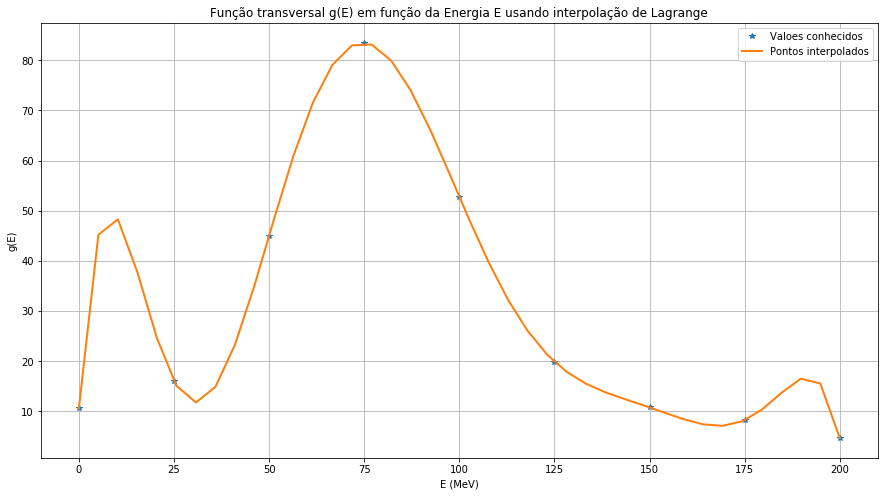

In [191]:
#gr√°fico dos dados obtidos
plt.figure(figsize=(15,8))
plt.plot(E,g,'*', label='Valoes conhecidos')
plt.plot(x,f, '-', lw=2, label='Pontos interpolados')
plt.xlabel('E (MeV)')
plt.ylabel('g(E)')
plt.title('Fun√ß√£o transversal g(E) em fun√ß√£o da Energia E usando interpola√ß√£o de Lagrange')
plt.legend()
plt.grid()

A partir da curva obtida na interpola√ß√£o, encontre a energia para a qual a se√ß√£o de choque √© m√°xima,  ùê∏ùëü:

In [192]:
#valor m√°ximo da se√ß√£o de choque
fmax = np.max(f)
#posi√ß√£o no array
a, = np.where(f == fmax)

#Energia para a qual a se√ß√£o de choque g(E) √© m√°xima:
E_r = x[a]
print('A energia para a qual a se√ß√£o de choque g(E) √© m√°xima √© de', round(E_r[0],3), 'MeV. Sendo pr√≥ximo do valor te√≥rico de 78 MeV, o que demonstra um erro do m√©todo de cerca de 1.5%.')


A energia para a qual a se√ß√£o de choque g(E) √© m√°xima √© de 76.923 MeV. Sendo pr√≥ximo do valor te√≥rico de 78 MeV, o que demonstra um erro do m√©todo de cerca de 1.5%.


Estime tamb√©m a largura a m√©dia altura,  Œì :

In [193]:
mei_fmax = fmax/2

y=[]
for i,elem in enumerate(x):
    if elem <=175. and elem>=30:
        f2 = f[i]
        if np.abs(f[i] - mei_fmax) <=6.5:
            y1 = f[i]
            y.append((y1))
            
            
a3, = np.where(f == y[0])
x_1 = x[a3] 
a4, = np.where(f == y[1])
x_2 = x[a4] 
dif2 = x_2 - x_1
print('A largura a m√©dia altura, Œì, calculada foi de', round(dif2[0],3), '. Tendo um erro do m√©todo de cerca de 12%.')

A largura a m√©dia altura, Œì, calculada foi de 61.538 . Tendo um erro do m√©todo de cerca de 12%.


2) Realize a interpola√ß√£o utilizando o m√©todo de cubic splines. Estime novamente  ùê∏ùëü  e  Œì .

In [194]:
from scipy import interpolate

In [195]:
# A fun√ß√£o splrep calcula a representa√ß√£o dos splines
# a saida √© uma tupla que tem (t,c,k), t s√£o so pontos 
# c s√£o os coeficientes, e k a ordem

tck = interpolate.splrep(E, g, s=0)

In [196]:
ycs = interpolate.splev(x, tck, der=0)

Text(0.5, 1.0, 'Fun√ß√£o transversal g(E) em fun√ß√£o da energia E usando cubic splines')

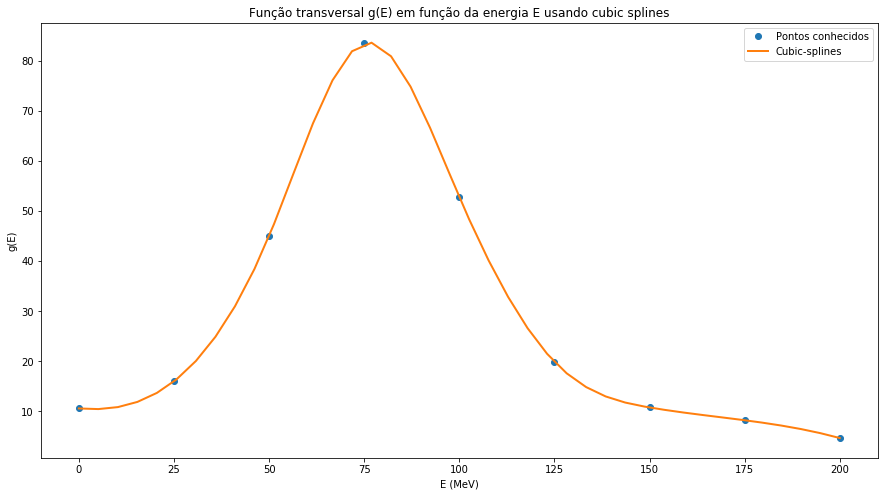

In [197]:
# Agora podemos graficar
plt.figure(figsize=(15,8))
plt.plot(E,g,'o', label='Pontos conhecidos')
plt.plot(x,ycs,label='Cubic-splines',lw=2)
plt.xlabel('E (MeV)')
plt.ylabel('g(E)')
plt.legend()
plt.title('Fun√ß√£o transversal g(E) em fun√ß√£o da energia E usando cubic splines')

A partir da curva obtida na interpola√ß√£o, encontre a energia para a qual a se√ß√£o de choque √© m√°xima,  ùê∏ùëü:

In [198]:
#valor m√°ximo da se√ß√£o de choque
fmax2 = np.max(ycs)
#posi√ß√£o no array
a2, = np.where(ycs == fmax2)

#Energia para a qual a se√ß√£o de choque g(E) √© m√°xima:
E_r2 = x[a2]
print('A energia para a qual a se√ß√£o de choque g(E) √© m√°xima √© de', round(E_r2[0],3), 'MeV. Sendo pr√≥ximo do valor te√≥rico de 78 MeV, o que demonstra um erro do m√©todo de cerca de 1.5%.')

A energia para a qual a se√ß√£o de choque g(E) √© m√°xima √© de 76.923 MeV. Sendo pr√≥ximo do valor te√≥rico de 78 MeV, o que demonstra um erro do m√©todo de cerca de 1.5%.


Estime tamb√©m a largura a m√©dia altura,  Œì :

In [199]:
mei_fmax2 = fmax2/2

y=[]
for i,elem in enumerate(ycs):
    if np.abs(elem - mei_fmax) <=5:
        y1 = elem
        y.append((y1))
    
a3, = np.where(ycs == y[0])
x_1 = x[a3] 
a4, = np.where(ycs == y[1])
x_2 = x[a4] 
dif = x_2 - x_1
print('A largura a m√©dia altura, Œì, calculada foi de', round(dif[0],3), '. Tendo um erro do m√©todo de cerca de 12%.')

A largura a m√©dia altura, Œì, calculada foi de 61.538 . Tendo um erro do m√©todo de cerca de 12%.


#### 4. Regress√£o linear, mercado de a√ß√µes (25%)

No site https://finance.yahoo.com/ √© poss√≠vel descarregar dados hist√≥ricos de ativos (`historical data`) que cotizam no mercado de a√ß√µes.  Descarregue os dados de, por exemplo, a Petrobras (PETR4), ou a Vale (VALE5). S√≥ um item √© suficiente. 

(A tabela CSV tem colunas indicando o pre√ßo di√°rio de abertura, o mais alto, o mais baixo,  os pre√ßos de fechamento e o volume de a√ß√µes negociadas).

a)  Leia os dados CSV utilizando pandas. 

In [200]:
#Dados da Petrobras do dia 10/06 a 14/06 (PETR4)
data_day = pd.read_csv('PETR4.SA.day.csv')

#DataFrame dos pre√ßos de fechamento em fun√ß√£o da data
#DF1 = data_day_temp.join(data_day_close)

In [201]:
#leitura dos dados:

#DataFrame dos cinco ultimos dias 
data_day_temp = pd.read_csv('PETR4.SA.day.csv', usecols=[0])

#DataFrame dos pre√ßos de fechamento para os cinco ultimos dias
data_day_close = pd.read_csv('PETR4.SA.day.csv', usecols=[4])

#DataFrame das datas do mes de maio
data_month_temp = pd.read_csv('PETR4.SA.m.csv', usecols=[0])

#DataFrame dos pre√ßos de fechamento para o mes de maio
data_month_close = pd.read_csv('PETR4.SA.m.csv', usecols=[4])

#DataFrame das datas do ultimos 6 meses
data_6_temp = pd.read_csv('PETR4.SA.6.csv', usecols=[0])

#DataFrame dos pre√ßos de fechamento para os ultimos 6 meses
data_6_close = pd.read_csv('PETR4.SA.6.csv', usecols=[4])

Utilizando os m√≠nimos quadrados fa√ßa um ajuste da curva de pre√ßos de fechamento dessas a√ß√µes como fun√ß√£o do tempo.  Considere os dados correspondentes a: os √∫ltimos 5 dias, o √∫ltimo m√©s, os √∫ltimos seis meses. Estime os coeficientes do ajuste linear e o √≠ndice de correla√ß√£o $R^2$ para cada intervalo de tempo. 

b) Para os tr√©s intervalos de tempo, estime a previs√£o do valor dessa a√ß√£o para a pr√≥xima sexta feira as 12h.


In [202]:
# Esta fun√ß√£o calcula todas as somas para calcular a0, a1 e R2
# 
def sums(dados):
    [X,Y,XX,YY,XY] = [0.0,0.0,0.0,0.0,0.0]
    for p in dados:
        X += p[0]
        Y += p[1]
        XX += pow(p[0],2.0)
        YY += pow(p[1],2.0)
        XY += p[0]*p[1]
    return [X,Y,XX,YY,XY]

In [203]:
# fun√ß√£o que calcula os coeficientes para o ajuste
# linear de m√≠nimos quadrados

def linear_lsf(dados,**args):
    [X,Y,XX,YY,XY] = sums(dados)
    m = len(dados)
    a0 = (Y*XX-X*XY)/(m*XX-X*X)
    a1 = (m*XY-X*Y)/(m*XX-X*X)    
    return a0,a1

def linear_f(x):
    a0,a1 = linear_lsf(dados)
    return a0+a1*x

## funcion que calcula el coeficiente de correlaci√≥n
def R2(dados):
    import math as mt
    [X,Y,XX,YY,XY] = sums(dados)
    m = len(dados)
    return (m*XY-X*Y)/(mt.sqrt((m*XX-X*X)*(m*YY-Y*Y)))

In [204]:
#para os 5 ultimos dias:
#transforma os valores do DF em lista
close = data_day_close.values.tolist()

In [205]:
#categoriza a data
data_day_temp['Date'] = pd.to_datetime(data_day_temp['Date'],format='%Y/%m/%d')

In [206]:
#loop que gera um conjunto dos dados de pre√ßos de fechamento em fun√ß√£o do tempo para o 5 ultimos dias
dados = []

for i, elem in enumerate(data_day_temp['Date']):
    data = data_day_temp['Date'][i].day
    cl = close[i][0]
    dados.append((data,cl))
    
print(dados)

[(10, 26.65), (11, 27.16), (12, 26.85), (13, 27.18), (14, 27.0)]


In [207]:
#an√°lise
a0, a1 = linear_lsf(dados)
r2 = R2(dados) # coeficiente de correlacao
print('a_0 = ', round(a0,8))
print('a_1 = ', round(a1,8))
print('R^2 = ', round(r2,8))
x = np.linspace(10,14,100)
y = linear_f(x) # modelo lineal


a_0 =  26.104
a_1 =  0.072
R^2 =  0.51183684


Text(0.5, 1.0, 'Pre√ßos de fechamento em fun√ß√£o do tempo para os cinco √∫ltimos dias')

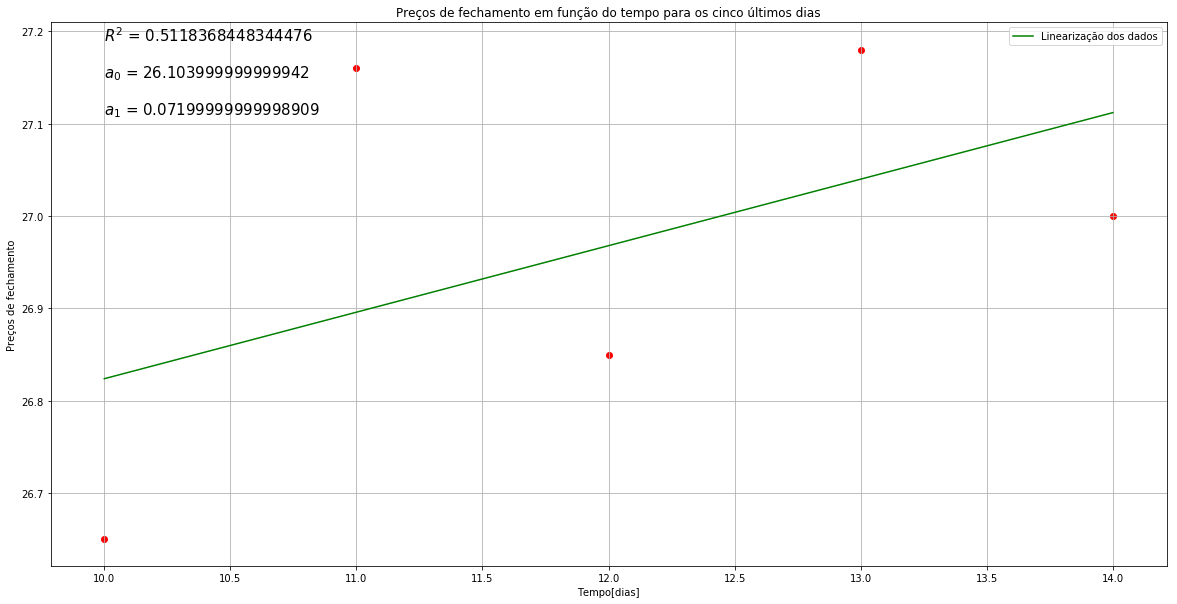

In [208]:
# Grafico dos dados de 5 dias e a reta de lineariza√ß√£o dos dados
plt.figure(figsize=(20,10))
plt.text(10,27.19,r'$R^2$ = '+str(r2),fontsize=15)
plt.text(10,27.15,r'$a_0$ = '+str(a0),fontsize=15)
plt.text(10,27.11,r'$a_1$ = '+ str(a1),fontsize=15)
plt.plot(x, y,'g',label='Lineariza√ß√£o dos dados')
plt.xlabel('Tempo[dias]')
plt.ylabel('Pre√ßos de fechamento')
for p in dados:
    plt.scatter(p[0],p[1],c='r')
plt.grid(True)
plt.legend()
plt.title('Pre√ßos de fechamento em fun√ß√£o do tempo para os cinco √∫ltimos dias')

In [209]:
#previs√£o prox sexta dia 21:
x_sexta = 21
y_sexta = a0 + a1*x_sexta
print('A previs√£o do valor dessa a√ß√£o para a pr√≥xima sexta, dia 21, foi de',round(y_sexta,4))

A previs√£o do valor dessa a√ß√£o para a pr√≥xima sexta, dia 21, foi de 27.616


In [210]:
#para o m√™s de maio:
#transforma os valores do DF em lista
close1 = data_month_close.values.tolist()

In [211]:
#categoriza a data
data_month_temp['Date'] = pd.to_datetime(data_month_temp['Date'],format='%Y/%m/%d')

In [212]:
#loop que gera um conjunto dos dados de pre√ßos de fechamento em fun√ß√£o do tempo para o m√™s de maio
dados = []

for i, elem in enumerate(data_month_temp['Date']):
    data1 = data_month_temp['Date'][i].day
    cl1 = close1[i][0]
    dados.append((data1,cl1))
    
print(dados)

[(2, 26.73), (3, 26.85), (6, 26.77), (7, 26.35), (8, 27.370001000000002), (9, 26.83), (10, 26.68), (13, 25.9), (14, 26.0), (15, 25.879998999999998), (16, 25.27), (17, 24.68), (20, 25.52), (21, 26.49), (22, 26.290001), (23, 25.84), (24, 26.09), (27, 26.24), (28, 26.799999), (29, 26.5), (30, 26.15), (31, 25.549999)]


In [213]:
#an√°lise
a0, a1 = linear_lsf(dados)
r2 = R2(dados) # coeficiente de correlacao
print('a_0 = ', round(a0,8))
print('a_1 = ', round(a1,8))
print('R^2 = ', round(r2,8))
x = np.linspace(2,31,100)
y = linear_f(x) # modelo lineal


a_0 =  26.63979933
a_1 =  -0.02478823
R^2 =  -0.36414388


Text(0.5, 1.0, 'Pre√ßos de fechamento em fun√ß√£o do tempo para o m√™s de maio')

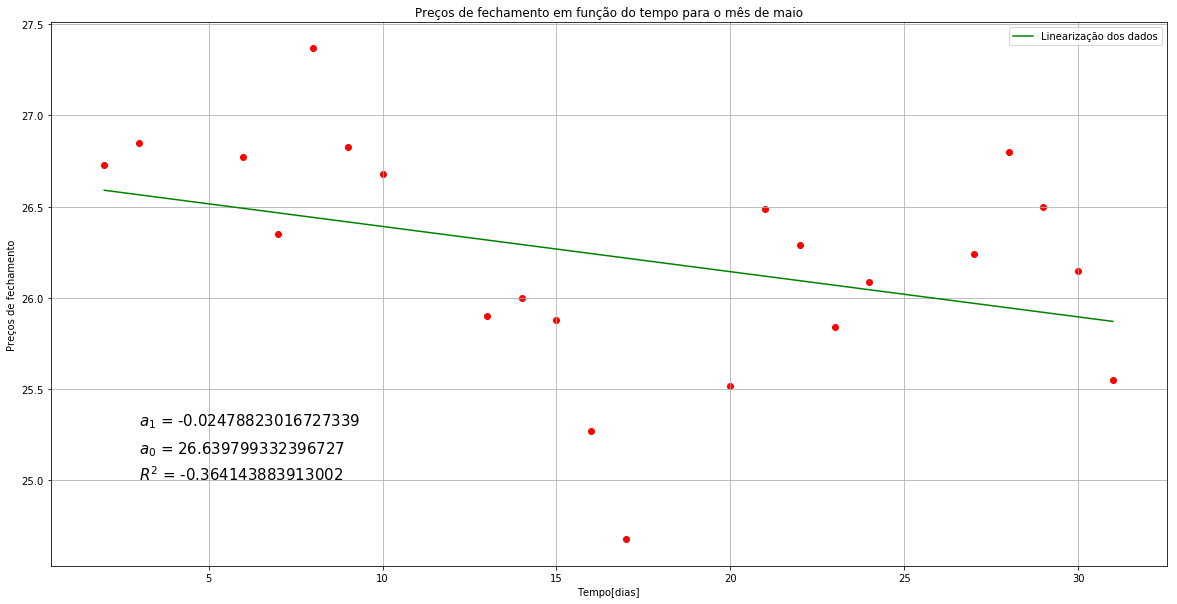

In [214]:
# Grafico dos dados de maio e a reta de lineariza√ß√£o dos dados
plt.figure(figsize=(20,10))
plt.text(3,25,r'$R^2$ = '+str(r2),fontsize=15)
plt.text(3,25.15,r'$a_0$ = '+str(a0),fontsize=15)
plt.text(3,25.30,r'$a_1$ = '+ str(a1),fontsize=15)
plt.plot(x, y,'g',label='Lineariza√ß√£o dos dados')
plt.xlabel('Tempo[dias]')
plt.ylabel('Pre√ßos de fechamento')
for p in dados:
    plt.scatter(p[0],p[1],c='r')
plt.grid(True)
plt.legend()
plt.title('Pre√ßos de fechamento em fun√ß√£o do tempo para o m√™s de maio')

In [215]:
#previs√£o prox sexta dia 21:
#22 √© o n√∫mero de dias conhecidos mais 15 dias √∫teis ate a sexta dia 21
x_sexta = 22 + 15
y_sexta = a0 + a1*x_sexta
print('A previs√£o do valor dessa a√ß√£o para a pr√≥xima sexta, dia 21, foi de',round(y_sexta,4))

A previs√£o do valor dessa a√ß√£o para a pr√≥xima sexta, dia 21, foi de 25.7226


In [216]:
#para os 6 ultimos meses:
#transforma os valores do DF em lista
close2 = data_6_close.values.tolist()

In [217]:
#categoriza a data
data_6_temp['Date'] = pd.to_datetime(data_6_temp['Date'],format='%Y/%m/%d')

In [218]:
"""dados = []

for i, elem in enumerate(data_6_temp['Date']):
    data2 = data_6_temp['Date'][i].day
    cl2 = close2[i][0]
    dados.append((data2,cl2))
    
dados"""

"dados = []\n\nfor i, elem in enumerate(data_6_temp['Date']):\n    data2 = data_6_temp['Date'][i].day\n    cl2 = close2[i][0]\n    dados.append((data2,cl2))\n    \ndados"

In [219]:
#loop que gera um conjunto dos dados de pre√ßos de fechamento em fun√ß√£o do tempo para os ultimos 6 meses (180 dias)
dados = []
t= np.linspace(0,180,180)
for i, elem in enumerate(close2):
    t2 = t[i]
    cl2 = close2[i][0]
    dados.append((t2,cl2))


In [220]:
#an√°lise
a0, a1 = linear_lsf(dados)
r2 = R2(dados) # coeficiente de correlacao
print('a_0 = ', round(a0,8))
print('a_1 = ', round(a1,8))
print('R^2 = ', round(r2,8))
x = np.linspace(0,130,1000)
y = linear_f(x) # modelo lineal

a_0 =  24.8527394
a_1 =  0.02411713
R^2 =  0.52262616


Text(0.5, 1.0, 'Pre√ßos de fechamento em fun√ß√£o do tempo para os √∫ltimos 6 meses')

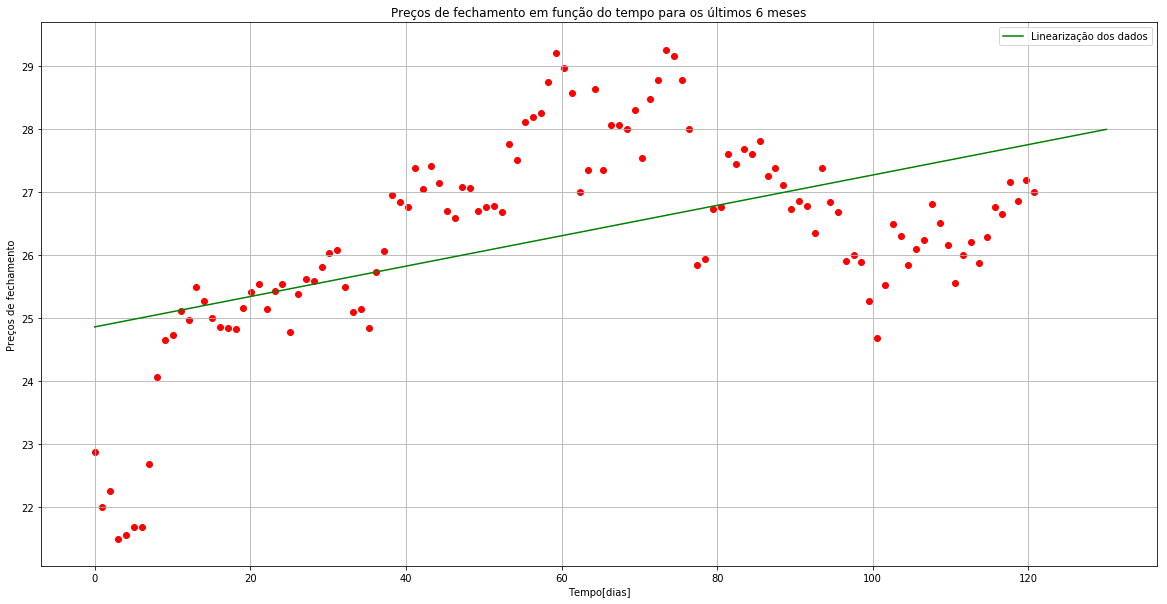

In [221]:
# Grafico dos dados dos √∫ltimos 6 meses e a reta de lineariza√ß√£o dos dados
plt.figure(figsize=(20,10))
#plt.text(0,22,r'$R^2$ = '+str(r2),fontsize=15)
#plt.text(0,22.5,r'$a_0$ = '+str(a0),fontsize=15)
#plt.text(0,23,r'$a_1$ = '+ str(a1),fontsize=15)
plt.plot(x, y,'g',label='Lineariza√ß√£o dos dados')
plt.xlabel('Tempo[dias]')
plt.ylabel('Pre√ßos de fechamento')
for p in dados:
    plt.scatter(p[0],p[1],c='r')
plt.grid(True)
plt.legend()
plt.title('Pre√ßos de fechamento em fun√ß√£o do tempo para os √∫ltimos 6 meses')

In [222]:
#previs√£o prox sexta dia 21:
#180 √© o n√∫mero de dias conhecidos mais 5 dias √∫teis ate a sexta dia 21
x_sexta = 180 + 5
y_sexta = a0 + a1*x_sexta
print('A previs√£o do valor dessa a√ß√£o para a pr√≥xima sexta, dia 21, foi de',round(y_sexta,4))

A previs√£o do valor dessa a√ß√£o para a pr√≥xima sexta, dia 21, foi de 29.3144
